In [29]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats


In [30]:
df = pd.read_csv('my_dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['OPEFLAG', 'CONTROL', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'OPENADMP',
       'ADM_RATE', 'SAT_AVG', 'ACTCMMID', 'COSTT4_A', 'TUITIONFEE_IN',
       'TUITIONFEE_OUT', 'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN', 'PCT_HISPANIC',
       'UGDS', 'FTFTPCTFLOAN', 'FTFTPCTPELL', 'DEBT_MDN', 'C100_4', 'C150_4',
       'C100_4_POOLED', 'C150_4_POOLED', 'RET_FT4', 'RET_PT4',
       'RET_FT4_POOLED', 'RET_PT4_POOLED', 'MEDIAN_HH_INC', 'LN_MEDIAN_HH_INC',
       'POVERTY_RATE', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1',
       'INC_PCT_H2', 'PPTUG_EF2', 'NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB',
       'NUM4_PUB', 'NUM4_PRIV', 'PFTFAC', 'DEP_STAT_PCT_IND', 'REGION'],
      dtype='object')

In [31]:
df.corr()['C150_4_POOLED'].sort_values()

FTFTPCTPELL      -0.593015
ADM_RATE         -0.355987
REGION           -0.179319
CONTROL          -0.117852
FTFTPCTFLOAN     -0.083558
OPEFLAG           0.002234
NPT41_PUB         0.033531
UGDS              0.193270
RET_PT4           0.219215
PFTFAC            0.237818
RET_PT4_POOLED    0.316644
NUM4_PRIV         0.319880
TUITFTE           0.338561
OPENADMP          0.381871
NPT4_PUB          0.421264
NUM4_PUB          0.470871
NPT4_PRIV         0.478567
INEXPFTE          0.488471
TUITIONFEE_IN     0.572610
AVGFACSAL         0.593928
COSTT4_A          0.608755
RET_FT4           0.656363
TUITIONFEE_OUT    0.697612
RET_FT4_POOLED    0.732853
SAT_AVG           0.825884
ACTCMMID          0.834112
C100_4            0.850281
C100_4_POOLED     0.876786
C150_4            0.948759
C150_4_POOLED     1.000000
PPTUG_EF2              NaN
Name: C150_4_POOLED, dtype: float64

In [27]:
df1 = df[['C150_4_POOLED','INC_PCT_LO','FTFTPCTPELL','INEXPFTE','MEDIAN_HH_INC','TUITIONFEE_IN','AVGFACSAL','COSTT4_A','TUITIONFEE_OUT','RET_FT4_POOLED','INC_PCT_H2','SAT_AVG','ACTCMMID','DEP_STAT_PCT_IND','OPENADMP']]

In [28]:
df1.corr()['C150_4_POOLED']

C150_4_POOLED       1.000000
INC_PCT_LO         -0.652497
FTFTPCTPELL        -0.593015
INEXPFTE            0.488471
MEDIAN_HH_INC       0.550768
TUITIONFEE_IN       0.572610
AVGFACSAL           0.593928
COSTT4_A            0.608755
TUITIONFEE_OUT      0.697612
RET_FT4_POOLED      0.732853
INC_PCT_H2          0.765626
SAT_AVG             0.825884
ACTCMMID            0.834112
DEP_STAT_PCT_IND   -0.550656
OPENADMP            0.381871
Name: C150_4_POOLED, dtype: float64

## Visualizations

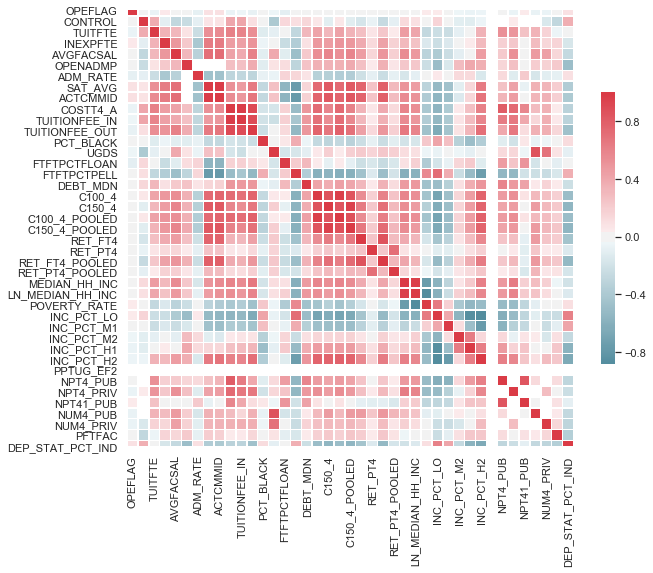

In [6]:
# heatmap 1
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

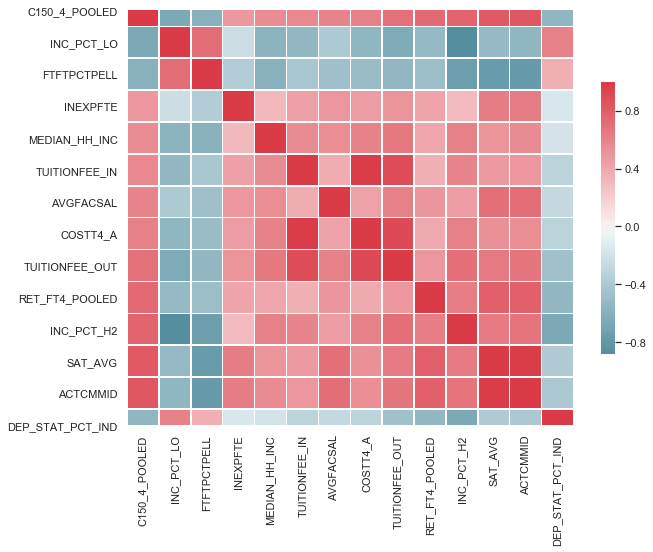

In [19]:
# heatmap 2
sns.set(style="white")
# Compute the correlation matrix
corr = df1.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

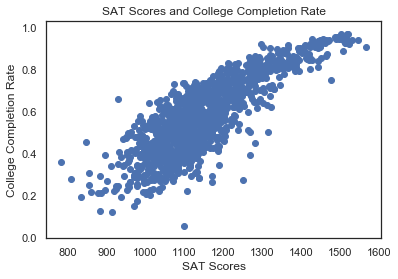

In [8]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('SAT Scores and College Completion Rate')
ax.set_xlabel('SAT Scores')
ax.set_ylabel('College Completion Rate')
x = df['SAT_AVG']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.show();

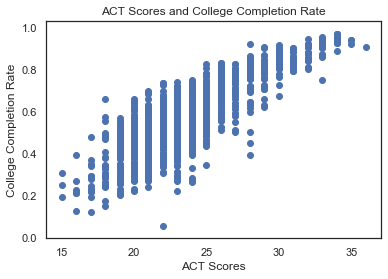

In [9]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('ACT Scores and College Completion Rate')
ax.set_xlabel('ACT Scores')
ax.set_ylabel('College Completion Rate')
x = df['ACTCMMID']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.show();

In [10]:
# ACT low, mid & high 
act_low = df1[df1['ACTCMMID'] < 18.5]
act_mid = df1[df1['ACTCMMID'] <= 22.5]
act_high = df1[df1['ACTCMMID'] > 22.5]

# SAT low, mid & high 
sat_low = df1[df1['SAT_AVG'] < 900]
sat_mid = df1[df1['SAT_AVG'] <= 1200]
sat_high = df1[df1['SAT_AVG'] > 1200]

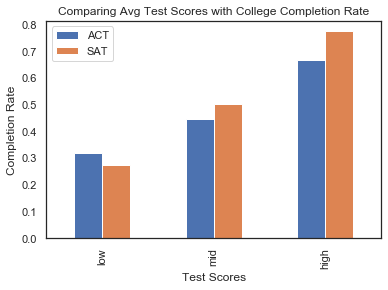

In [11]:
low_values = [act_low['C150_4_POOLED'].mean(),sat_low['C150_4_POOLED'].mean()]
mid_values = [act_mid['C150_4_POOLED'].mean(),sat_mid['C150_4_POOLED'].mean()]
high_values = [act_high['C150_4_POOLED'].mean(),sat_high['C150_4_POOLED'].mean()]
labels = ['ACT','SAT']

df_low = pd.DataFrame(low_values,index=labels)
df_mid = pd.DataFrame(mid_values,index=labels)
df_high = pd.DataFrame(high_values,index=labels)

df_bar = pd.concat([df_low.T, df_mid.T, df_high.T], axis=0, ignore_index=False)
df_bar.reset_index(inplace = True)
labels = ['low','mid','high']
df_bar['Test Scores'] = labels

ax = df_bar.plot(x='Test Scores', y=['ACT','SAT'], kind="bar");
ax.set_title('Comparing Avg Test Scores with College Completion Rate')
ax.set_ylabel('Completion Rate')
plt.show()

In [39]:
# dropping 0 because there are only 5 schools in that category 
df['REGION'].replace(0,np.nan,inplace=True)

In [41]:
df['REGION'].value_counts()

5.0    482
2.0    399
3.0    295
8.0    230
4.0    210
1.0    164
6.0    161
7.0     61
9.0     51
Name: REGION, dtype: int64

In [40]:
regional_grad_rates

REGION
1.0    0.626839
2.0    0.559121
3.0    0.539301
4.0    0.518337
5.0    0.461778
6.0    0.420052
7.0    0.473725
8.0    0.566527
9.0    0.378580
Name: C150_4_POOLED, dtype: float64

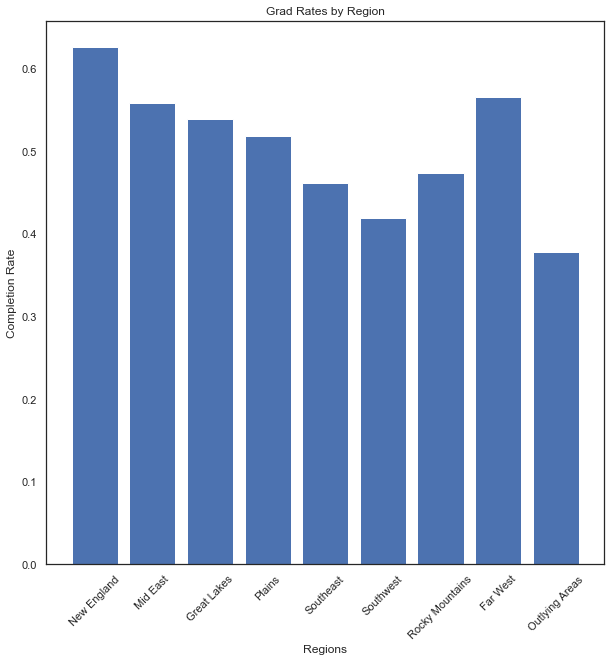

In [46]:
# bar chart of grad rates by region 
regional_grad_rates = df.groupby('REGION')['C150_4_POOLED'].mean()
regions = ['New England','Mid East','Great Lakes','Plains','Southeast','Southwest','Rocky Mountains','Far West','Outlying Areas']

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(regions, regional_grad_rates)
plt.xticks(rotation=45)
ax.set_title('Grad Rates by Region')
ax.set_xlabel('Regions')
ax.set_ylabel('Completion Rate')
plt.show()

## Hypothesis Testing

#### 1. comparing grad rate means for low, mid and high scoring schools (ACT)

##### ANOVA 
H0: there is no significant difference in grad rates for low, mid & high scoring schools

Ha: there is a significant difference in grad rates for low, mid & high scoring schools 

In [12]:
df_act = df1[['C150_4_POOLED','ACTCMMID']]
df_act.dropna(inplace=True)
df_act

/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,C150_4_POOLED,ACTCMMID
0,0.2533,18.0
1,0.5567,25.0
3,0.5020,28.0
4,0.2901,18.0
5,0.6998,27.0
...,...,...
2010,0.4255,24.0
2011,0.6693,25.0
2019,0.5491,20.0
2032,0.3443,18.0


In [13]:
stats.f_oneway(df_act['C150_4_POOLED'][df_act['ACTCMMID'] < 18.5],
               df_act['C150_4_POOLED'][df_act['ACTCMMID'] <= 22.5],
               df_act['C150_4_POOLED'][df_act['ACTCMMID'] > 22.5])

F_onewayResult(statistic=487.6369484916427, pvalue=4.8244965122291765e-158)

##### result is significant with very low p-value...so we can reject the null that the means are equal for these groups

#### 2. comparing grad rate means for low, mid and high scoring schools (SAT)

##### ANOVA
H0: there is no significant difference in grad rates for low, mid & high scoring schools

Ha: there is a significant difference in grad rates for low, mid & high scoring schools 

In [14]:
df_sat = df1[['C150_4_POOLED','SAT_AVG']]
df_sat.dropna(inplace=True)
df_sat

/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,C150_4_POOLED,SAT_AVG
0,0.2533,957.0
1,0.5567,1220.0
3,0.5020,1314.0
4,0.2901,972.0
5,0.6998,1252.0
...,...,...
2010,0.4255,1173.0
2011,0.6693,1213.0
2019,0.5491,1035.0
2032,0.3443,978.0


In [15]:
stats.f_oneway(df_sat['C150_4_POOLED'][df_sat['SAT_AVG'] < 1000],
               df_sat['C150_4_POOLED'][df_sat['SAT_AVG'] <= 1200],
               df_sat['C150_4_POOLED'][df_sat['SAT_AVG'] > 1200])

F_onewayResult(statistic=685.9541015832941, pvalue=4.9359439688738197e-206)

##### result is significant with very low p-value...so we can reject the null that the means are equal for these groups

#### 3. comparing difference in grad rates and median household income

In [52]:
df1.describe()

,C150_4_POOLED,INC_PCT_LO,FTFTPCTPELL,INEXPFTE,MEDIAN_HH_INC,TUITIONFEE_IN,AVGFACSAL,COSTT4_A,TUITIONFEE_OUT,RET_FT4_POOLED,INC_PCT_H2,SAT_AVG,ACTCMMID,DEP_STAT_PCT_IND,OPENADMP
count,1910.000000,1929.000000,1911.000000,2055.000000,1802.000000,1947.000000,1996.000000,1869.000000,1947.000000,1943.000000,1760.000000,1258.000000,1236.000000,1821.000000,1958.000000
mean,0.518117,0.394107,0.438858,10943.215572,62637.586498,22345.557781,7558.536573,35042.368111,25704.923472,0.729704,0.193179,1145.262321,23.661812,0.303518,1.859551
std,0.204504,0.167462,0.222045,11356.803305,12633.299431,14377.491216,2633.771663,15863.995566,12771.413086,0.151352,0.122772,124.148471,3.740428,0.250819,0.347541
min,0.000000,0.086801,0.000000,0.000000,17277.840000,1080.000000,453.000000,6646.000000,1080.000000,0.000000,0.001318,785.000000,15.000000,0.010880,1.000000
25%,0.380325,0.268810,0.280900,5908.000000,55737.705000,9820.000000,5968.500000,21860.000000,16062.500000,0.654500,0.100357,1062.000000,21.000000,0.117967,2.000000
50%,0.519650,0.363503,0.414700,8518.000000,62911.405000,17665.000000,7293.500000,31282.000000,23520.000000,0.750000,0.172932,1126.000000,23.000000,0.220294,2.000000
75%,0.659950,0.490166,0.555600,12152.000000,71417.442500,32655.000000,8922.000000,46147.000000,34003.000000,0.826900,0.278232,1203.750000,25.000000,0.410959,2.000000
max,1.000000,0.935613,1.000000,161644.000000,96737.950000,59430.000000,20484.000000,75735.000000,59430.000000,1.000000,0.606421,1566.000000,36.000000,0.970042,2.000000


##### two sample t-test, one sided
H0: there is no significant difference in graduation rates for schools with above average household incomes than those with below average incomes 
- mu_above_avg <= mu_below_avg

Ha: there is a significant difference in graduation rates for schools with above average household incomes than those with below average 
- mu_above_avg > mu_below_avg 

In [54]:
df_above = df1[df1['MEDIAN_HH_INC']>62911]
df_below = df1[df1['MEDIAN_HH_INC']<=62911]

#### 4. comparing grad rates by income categories

#### 5. comparing grad rates by instructional expenditure 